# CoE 197M Homework 2 (Backpropagation)
### Jan Marvin D. Moyco 2015-09359

The code here shows an implementation of Backpropagation algorithm. The input and output were generated using a Gaussian distribution and the output will be used to estimate the model used in the system. The codes I used are based on the ones I found on the internet so I have many references on backpropagation.

### Main references: 

##### Neural Network Formation and Backpropagation

https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba

https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

https://github.com/SkalskiP/ILearnDeepLearning.py/blob/master/01_mysteries_of_neural_networks/03_numpy_neural_net/Numpy%20deep%20neural%20network.ipynb

https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html

https://github.com/roatienza/ml

##### Dataset Forming (Histogram and Binning/Discretizing)

https://cmdlinetips.com/2019/12/how-to-discretize-bin-a-variable-in-python/

https://numpy.org/doc/stable/user/basics.indexing.html

#### Importing the libraries required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Getting user input
This part lets the user choose a mean and standard deviation to be used in the generation of samples using a Gaussian distribution.

In [2]:
print('Enter a mean and standard deviation.')
check_input = False
while check_input == False:
    try:
        user_mean = float(input('Input a mean: '))
        user_std = float(input('Input a standard deviation: '))
        check_input = True
    except ValueError:
        print("Please enter a proper value (integer or float to the input)\n")
print(f'The input mean is {user_mean}. \nThe input standard deviation is {user_std}\n')

Enter a mean and standard deviation.
Input a mean: 0
Input a standard deviation: 1
The input mean is 0.0. 
The input standard deviation is 1.0



#### Generating Samples
The samples are generated using numpy's function for a normal distribution. The formula used for the probability of normal distribution is shown below

$$p(x)\,=\,\frac{1}{\sqrt{2 \pi \sigma ^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma ^2}}$$

Where the $\sigma$ is the standard deviation, $\mu$ is the mean. After generating a 1-D Gaussian with a 1000000 samples, it is divided into two parts: 90% of the samples will be going to the train dataset while the remaining 10% will go to the test dataset. The function used in this part of the code generates a sample from a gaussian distribution (not the probability p(x)). The samples are kept in the range of [-2$\sigma$,+2$\sigma$] by resampling the samples that go beyond the range.

numpy.histogram() is used to get the p(x) of every bin (1000 bins). while digitize() is used to map the samples to the freq or p(x). The 1000 bins of the histogram() must be mapped to the 1 million samples generated so we can have the ground truth matrix $y$. Since density=True is in the options of histogram, the integral of the range will be 1. After getting the input and output data, the sample is split into 90% Train Dataset and 10% Test Dataset using slicing.

In [3]:
np.random.seed(5)
samples = np.random.default_rng().normal(user_mean,user_std,1000000)
#Makes sure that the samples are in the range of [-2std,+2std]
while samples[samples > ((2*user_std) + user_mean)].size != 0 or samples[samples < ((-2*user_std) + user_mean)].size != 0:
    samples[samples > ((2*user_std) + user_mean)] = np.random.default_rng().normal(user_mean,user_std,size=samples[samples > ((2*user_std) + user_mean)].size)
    samples[samples < ((-2*user_std)+ user_mean)] = np.random.default_rng().normal(user_mean,user_std,size=samples[samples < ((-2*user_std) + user_mean)].size)                                                              
    
    
        
h_samp,h_bin_edges =np.histogram(samples,bins=1000,density=True) 
#density=True is important so that the pdf is the value of freq and integral over range is 1 

#Using digitize() as a way to bin the samples properly (conditions using h_bin_edges)
#Note that the bin edges (h_bin_edges) should be 999 to remove the leftmost and rightmost edge from index.
samp_index = np.digitize(samples,h_bin_edges[1:h_bin_edges.size-1],right=True) 


#Since samp_index has a range of 0 to 1000, we can use this as index to the values of the freq (that has 1000 values)
#By using array indexing the indices (got from digitize() that corresponds to a specific input sample)
#the input samples can be mapped to a value of the freq(or the p(x) since density = True in histogram())
data_sample_output = h_samp[samp_index]  

#Getting the train dataset (90% of the whole dataset)
input_train = samples[:900000]
output_train = data_sample_output[:900000]
#Creating a dictionary for train so that I can easily locate the appropriate output value for a randomly sampled input (in training phase)
train_dict= {}
for i in range(900000):
    train_dict[input_train[i]]=output_train[i]
#Reshape the dataset to be (90%*dataset,1)
#input_train = input_train.reshape(900000,1)
#output_train = output_train.reshape(900000,1)


    
#Getting test dataset (10% of the whole dataset)
input_test = samples[900000:]
output_test = data_sample_output[900000:]
test_dict={}
for i in range(100000):
    test_dict[input_test[i]]=output_test[i]
#Reshape the dataset to be (10%*dataset,1)
#input_test = input_test.reshape(100000,1)
#output_test = output_test.reshape(100000,1)

    

print(f'Train Dataset\n')
print(f'Input Size: {input_train.shape}, Output Size: {output_train.shape}\n')
print(f'Test Dataset\n')
print(f'Input Size: {input_test.shape}, Output Size: {output_test.shape}\n')

Train Dataset

Input Size: (900000,), Output Size: (900000,)

Test Dataset

Input Size: (100000,), Output Size: (100000,)



#### Dataset Plot

The datasets are plotted in a scatter plot to see if they are correct. The first plot is the plot of the whole dataset (Train + Test), second is the Train Dataset, and last is the Test Dataset.

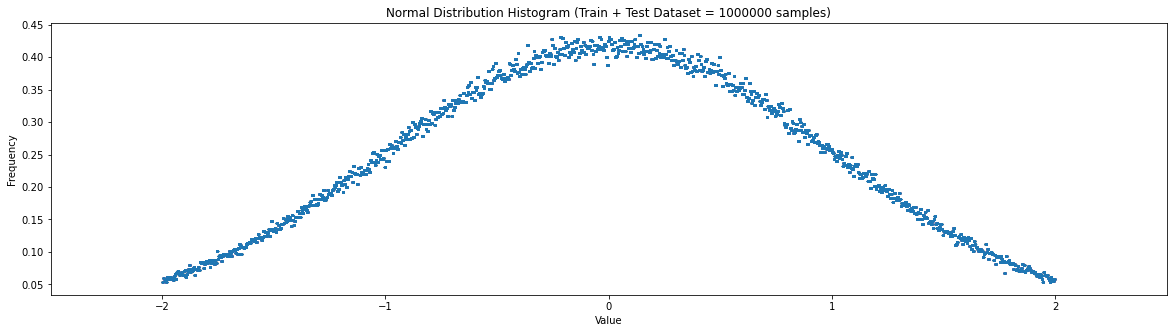

In [4]:
#Plot of the Whole Dataset (Train + Test)
plt.figure(figsize=[20,5])
plt.scatter(samples,data_sample_output,s=0.2)
plt.xlim(min(samples)-0.5, max(samples)+0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram (Train + Test Dataset = 1000000 samples)')
plt.show()

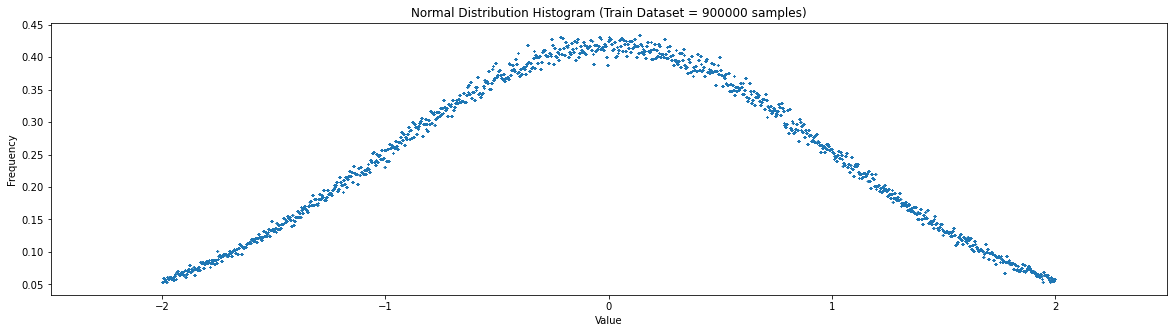

In [5]:
#Plot of Train Dataset
plt.figure(figsize=[20,5])
plt.scatter(input_train,output_train,s=0.05)
plt.xlim(min(input_train)-0.5, max(input_train)+0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram (Train Dataset = 900000 samples)')
plt.show()

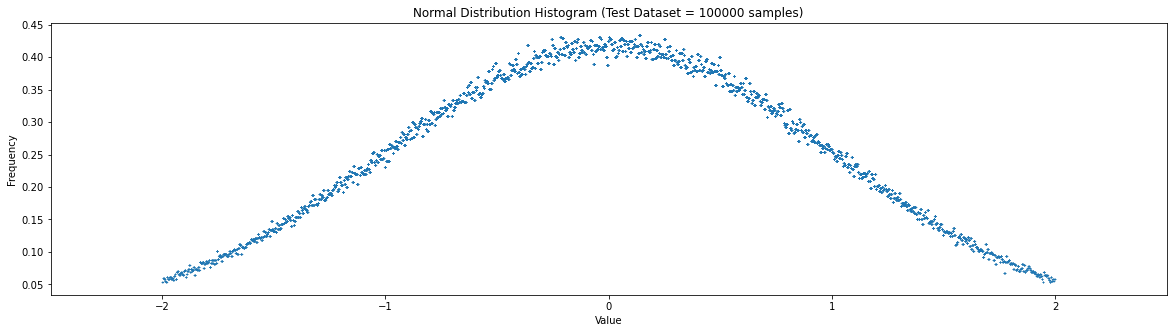

In [6]:
#Plot of Train Dataset
plt.figure(figsize=[20,5])
plt.scatter(input_test,output_test,s=0.05)
plt.xlim(min(input_test)-0.5, max(input_test)+0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram (Test Dataset = 100000 samples)')
plt.show()

#### Definition of Activation Functions
There are two activation functions used in this neural network, there are 2 layers of rectified linear unit (ReLU) and 1 layer of Sigmoid (optional).

First, the formula for the ReLU activation function ($\sigma (x)$) is:

$$\sigma _{ReLU}(x)\,=\,\left\{ \begin{array}{11} 0, & x\leq 0\\ x, & x>0 \end{array}\right.$$


$$\sigma _{ReLUBackward}(x)\,=\,\left\{ \begin{array}{11} 0, & x\leq 0\\ 1, & x>0 \end{array}\right.$$

Second, the formula for the sigmoid activation function is:

$$\sigma _{sigmoid}(x)\,=\,\frac{1}{1+e^{-x}}$$


$$\sigma_{sigmoidBackward}(x) \, =\, \sigma(x)(1-(\sigma(x))$$

The purpose of the activation functions in the neural network is to introduce some kind of non-linearity to the system. The backward direction is also integrated in the function so only one setup is only needed for each activation function.

In [8]:
#The functions are responsible for the forward (feed forward) and backward (backpropagation) of the system.
def reLU(x):#Input of this function: Z = WF + B
        return np.maximum(0,x)

def d_reLU(dA,Z):#Input of this function A: output of reLU(x) (A=reLU(x))
    dZ = dA.copy(order='K')
    dZ[Z <= 0] = 0
    return dZ

def sigmoid(x):#Input of this function: Z = WF + B
    return (1/(1+np.exp(-x)))
    
def d_sigmoid(x):#Input of this function: Z = WF + B
    sig = sigmoid(x)
    return sig*(1-sig)
    

#### Initialization of network layers
The architecture of the neural network is saved into a list of dictionaries where the input dimension, output dimension, and activation function is saved. There are three layers: 1st and 2nd layer is the **ReLU** and the last is a **sigmoid** layer that outputs a probability. There are 64 nodes per layer and 1 input (Gaussian sample) and 1 output (Probability).

The practices in saving and organizing data here is based on work of Piotr Skalski, where he uses dictionary to select the proper data and proper layer. The initialization of layers are done by creating weights and biases for the layers.The weights are initialized by sampling (Gaussian) from a mean of 0 and standard deviation of 0.01 while the biases were initialized by using the learning rate as their initialized value. The weights and biases matrices are stored in dictionaries stored_weights and stored_biases respectively.

In [9]:
NN_LAYERS=[#Creating a list of dictionaries so that the size and dimensions of the parameters are properly recorded
    #{"in_dim": 1,"out_dim": 64, "function": "Input"},
    {"in_dim": 1,"out_dim": 64, "function": "ReLU"},
    {"in_dim": 64,"out_dim": 64, "function": "ReLU"},
    {"in_dim": 64,"out_dim": 1, "function": "Sigmoid"}
]

def init_nnlayers(nn_layers,learning_rate):
    #np.random.seed(seed) #make sure that the values dont change so we can check
    #Parameters (for all layers) stored in a dictionary since it is much easier to access (by keys)
    stored_weights = {}
    stored_biases = {}
    for i,layer in enumerate(nn_layers):
        #print(f'Layer {i}, input dim: {layer["in_dim"]}, output dim: {layer["out_dim"]}, and function: {layer["function"]}')
        
        #Initializing Weights and Bias matrices - 
        #Weights - initialized from Gaussian Distribution (mean = 0, std = 0.01)
        #Bias - initialized usually has very small value (in this case value is equal to learning rate as discussed in lec)
        stored_weights["W"+str(i)]= np.random.default_rng().normal(0,0.01,size=(layer["in_dim"],layer["out_dim"])) # Weight dimension is (input,output) matrix
        stored_biases["B"+str(i)] = np.add(np.zeros((layer["out_dim"],1)),0) #Bias dimension (output,1)
    return stored_weights,stored_biases


#### Feed Forward

In this function, the input is pass through the layers so that the output of the layers will be a prediction $\hat{y}$. The following block diagram shows the flow of data in the neural network:

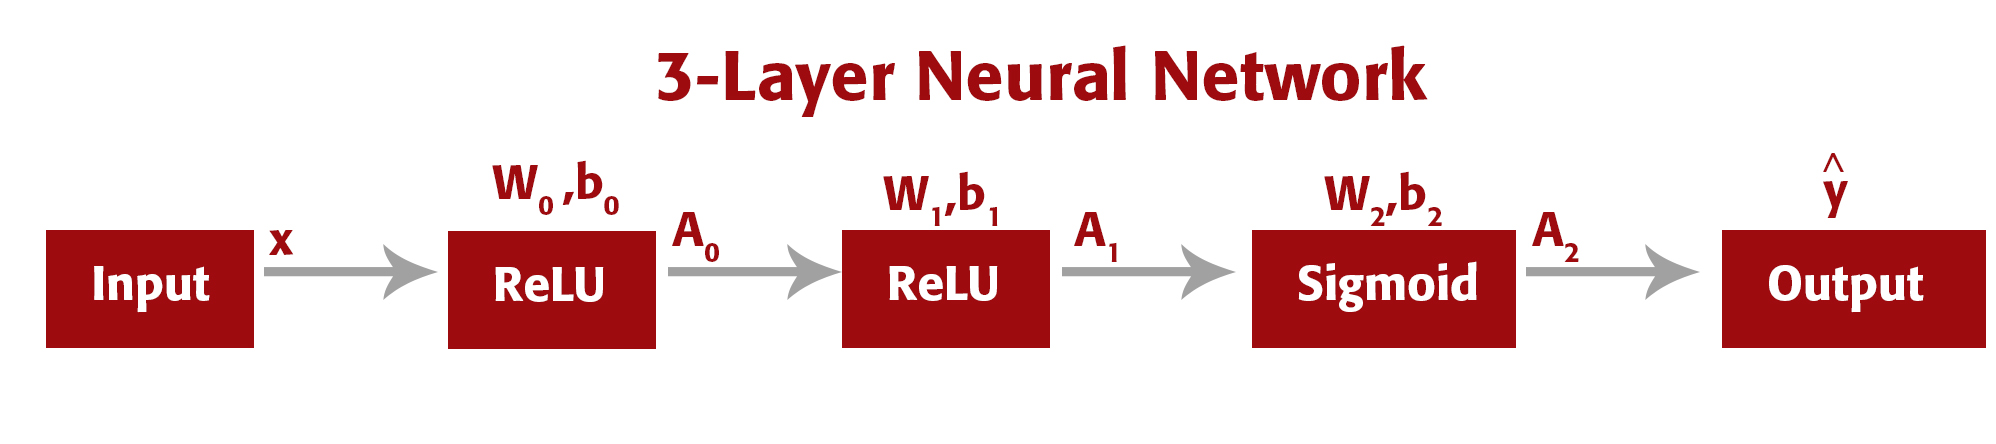

The input, from the samples are used to get the $Z_0$ which is used for the activation function of the layer. the formula for Z is shown below:

$$Z_n \, =\, W_{n-1}A_{n-1} + B_{n-1}$$

The formula shows how the input ($A$) is related to the weights and biases. Basically, the input for the activation functions $Z_n$ is a weighted input with a bias. After computing the input, it will be used in the activation function where the output will be:

$$A_n = \sigma (Z_n)$$

Note: At the start, A will only be the input of the neural network since there are no preceding activation functions.

After computing the output of the hidden layer, the input Z and output A will be stored in a dictionaries called Zcache and Acache respectively. These data will be important for the backpropagation. The last output of the activation layer Acurr ($A_2$) will be the predicted output such that:

$$ \hat{y} \,=\, A_2$$

This output will be used to compute for the loss function.

In [10]:
#input_value is the input (X) to the neural network from the data set (X,Y) => (input,output) 
def feed_forward(input_value,stored_weights,stored_biases,nn_layers): 
    A_0 = input_value #The input value X will be the current A (output of a layer)
    #Creating dictionary to save all pertinent data for backpropagation
    Acache = {}
    Zcache = {}
        
    #For layer n=0 (1st layer ReLU)
    #Getting the weights and biases from storage
    W_0 = stored_weights["W0"]
    B_0 = stored_biases["B0"]
    #Dimensions (64,1)=(1,64)^T(1,1)
    #Calculating Z (input to the activation function)
    #Z_0 = np.add(np.dot(W_0,A_0.T),B_0)
    Z_0 =  np.add(np.dot(W_0.T,A_0),B_0) #Needed to transpose W so that the dot product can be done W^T(64,1)X A(1,1). Not sure why
    A_1 = reLU(Z_0)
    #Saving A and Z previous to memory
    Acache["A0"] = A_0
    Acache["A1"] = A_1
    Zcache["Z0"] = Z_0
        
    #For the calculation of Z, Weight matrices were transpose such that the input can be (1,1) and the output can be (1,1) as well
    #For layer n=1 (2nd layer ReLU)
        
    W_1 = stored_weights["W1"]
    B_1 = stored_biases["B1"]
    #Calculating Z
    #Dimensions (64,1)=(64,64)^T(64,1)
    #Z_1 = np.add(np.dot(W_1,A_1.T),B_1)
    Z_1 = np.add(np.dot(W_1.T,A_1),B_1)#Needed to transpose W so that the dot product can be done W^T(64,64)X A(64,1). Not sure why
    A_2 = reLU(Z_1)
    #Saving A and Z to memory
    Acache["A2"] = A_2 #Input to sigmoid
    Zcache["Z1"] = Z_1
        
    #For layer n=2 (last layer sigmoid)
    #Load weights and biases
    W_2 = stored_weights["W2"]
    B_2 = stored_biases["B2"]
    #Calculate Z
    #Dimensions (1,1)=(64,1)^T(64,1) [used for reference to determine final shape]
    #Z_2 = np.add(np.dot(W_2,A_2.T),B_2)
    Z_2 = np.add(np.dot(W_2.T,A_2),B_2)#Needed to transpose W so that the dot product can be done W^T(1,64)X A(64,1). Not sure why
    A_3 = sigmoid(Z_2) #NN Output
    #Saving to memory
    Acache["A3"] = A_3
    Zcache["Z2"] = Z_2
    #Note that A3 in Acache is the prediction!!!!
        
    return A_3, Acache, Zcache #A_3 will be y_hat after the for loop since all layers are traversed.

#### Loss Function
Loss function is used to determine how far the predicted output to the truth (output data). There are several functions used as loss functions but in this case, the function that will be used is Mean Squared Error. The formula is shown below:

$$L(y,\hat{y})\,=\, \frac{1}{n}\sum_{i=1}^{n} (y_{i}-\hat{y_{i}})^{2}$$

$$\frac{\delta L(y,\hat{y})}{\delta\hat{y}}\,=\,-2(y_{i}-\hat{y_{i}}) = 2(\hat{y_{i}}-y_{i})$$

The functions shown are the one used for forward propagation and its derivative for backpropagation. After 1 epoch, the MSE of every data point will be combined by getting their average to get the total MSE for the whole dataset since the MSE should be computed after every feedforward pass for the backpropagation.

In [11]:
#Loss Function will be based on the Mean Squared Error and the arguments are the Acurr (predictions) and output (Y from X,Y)
def loss_function(prediction,data_output):
    diff_squared = np.sum(np.power(np.subtract(data_output,prediction),2))
    loss = (diff_squared)/len(data_output)
    return loss
#Derivative of loss function w.r.t. to the predicted output y hat
def d_loss_function(prediction,data_output):
    return 2*(prediction-data_output)

#### Backpropagation

Backpropagation is used usually after the feed forward and computation of loss function. It is used to update the weights and biases so that the model will be good at predicting the output values. The main concept used in Backpropagation is the chain rule in differential calculus. The formula associated with backpropagation are the following:

#### Layer n=2
###### Derivative of Loss Function with respect to $W_2$
$$\frac{\delta L}{W_2}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta W_2} \,=\, d_{2}\bullet A_{2}$$
###### Derivative of Loss Function with respect to $B_2$
$$\frac{\delta L}{B_2}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta B_2} \,=\, d_{2}$$

#### Layer n=1
###### Derivative of Loss Function with respect to $W_1$
$$\frac{\delta L}{W_1}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta f_{1}(z_{1})}\frac{\delta f_{1}(z_{1})}{\delta z_1}\frac{\delta z_1}{\delta W_1} \,=\, d_{1}\bullet A_{1}$$
###### Derivative of Loss Function with respect to $B_1$
$$\frac{\delta L}{B_1}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta f_{1}(z_{1})}\frac{\delta f_{1}(z_{1})}{\delta z_1}\frac{\delta z_1}{\delta B_1} \,=\, d_{1}$$

#### Layer n=0
###### Derivative of Loss Function with respect to $W_0$
$$\frac{\delta L}{W_0}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta f_{1}(z_{1})}\frac{\delta f_{1}(z_{1})}{\delta z_1}\frac{\delta z_1}{\delta f_{0}(z_{0})}\frac{\delta f_{0}(z_{0})}{\delta z_{0}}\frac{\delta z_0}{\delta W_0} \,=\, d_{0}\bullet A_{0}\,=\, d_{0}\bullet X$$
###### Derivative of Loss Function with respect to $B_0$
$$\frac{\delta L}{W_0}\,=\,\frac{\delta L}{\delta f_{2}(z_{2})}\frac{\delta f_{2}(z_{2})}{\delta z_{2}}\frac{\delta z_{2}}{\delta f_{1}(z_{1})}\frac{\delta f_{1}(z_{1})}{\delta z_1}\frac{\delta z_1}{\delta f_{0}(z_{0})}\frac{\delta f_{0}(z_{0})}{\delta z_{0}}\frac{\delta z_0}{\delta B_0} \,=\, d_{0}$$

The equations shown in this part are the ones used to do backpropagation, The chain rule is used to traversed the layers to get to the weights and biases from the inputs (Z) and outputs (A). There are similar terms in the equations of the first layer and next layer. In this way, the program can conserve processing time and used the previously computed terms usually ($\frac{\delta L}{\delta z_n}$) in all layers then multiply it to the respective terms in the layers to get the derivates of L with respect to the weights and biases. I honestly not sure if I understood this completely since it is a hard concept to wrap my head around but I think I have a shallow understanding of this concept.

The function does the above equations and saves the derivatives in a dictionary grads_cache. There are three layers so I did not loop into each layer so I can fully understand how the data goes in each layer.

In [12]:
# prediction is the Acurr from the forward propagation
def backpropagation(prediction,data_output,stored_weights,stored_biases,Acache,Zcache,nn_layers):
    #Creating a dictionary to store the gradients that will be calculated
    grads_cache ={}
    
    #Getting the derivative of the Loss function
    #Since there are only 3 layers, the loop is omitted so that I can understand the flow more deeply
    #print("Start of Iteration")
    #Starting from the last layer (n=2)
    dL2 = d_loss_function(prediction,output_val) #dL/dy_hat - derivative of loss function w.r.t. prediction
    d2 = dL2*d_sigmoid(Zcache["Z2"]) #sigmoid backwards*dL/dy_hat
    #Calculating the necessary derivatives
    dW2 = np.dot(Acache["A2"],d2.T)
    #print(f'dL2: {dL2.shape}, d2/dB2: {d2.shape}, dW2: {dW2.shape} ')
    #Storing in dictionary
    grads_cache["dW2"] = dW2
    grads_cache["dB2"] = d2 #Biases are only multiplied to 1 so it is also dn

    #Going to the next layer (n=1)
    dL1 = np.dot(stored_weights["W2"],d2)
    d1 = d_reLU(dL1,Zcache["Z1"])
    #Calculating the derivatives for weights and biases
    dW1 = np.dot(Acache["A1"],d1.T)
    #print(f'dL1: {dL1.shape}, d1/dB1: {d1.shape}, dW0: {dW1.shape} ')
    #Storing in dictionary
    grads_cache["dW1"] = dW1
    grads_cache["dB1"] = d1

    #Going to the next layer (n=0)
    dL0 = np.dot(stored_weights["W1"],d1)
    d0 = d_reLU(dL0,Zcache["Z0"]) #Zn is used not Zn-1
    #Calculating the derivatives for weights and biases
    dW0 = np.dot(Acache["A0"],d0.T)
    #print(f'dL0: {dL0.shape}, d0/dB0: {d0.shape}, dW1: {dW0.shape} ')
    #Storing in dictionary
    grads_cache["dW0"] = dW0
    grads_cache["dB0"] = d0
    
    return grads_cache
    

#### Gradient Descent (Updating Weights and Biases)

After doing the Backpropagation process, the output of that will be the derivatives of the Loss function with respect to each weights and biases. These values will be used to update the weights and biases so that for every iteration (1 epoch) the neural network comes nearer to the minimized or optimal values for the weights and biases. The formula for gradient descent is shown below:

$$ W_{n-1} \,=\, W_{n-1}*\epsilon \frac{\delta L}{\delta W_{n-1}}$$

$$ B_{n-1} \,=\, B_{n-1}*\epsilon \frac{\delta L}{\delta B_{n-1}}$$

The symbol $\epsilon$ is the learning rate which is used to determine how much of the weight is to be updated (either increased or decreased). The value of learning rate is usually from 0 to 1. In this case the learning rate used will be 0.1.

In [13]:
#Updating the weights and basis in this function using the learning rate and the solutions solved in the backpropagation
def gradient_descent(learning_rate,stored_weights,stored_biases,gradient_values,nn_layers):
    #Iterating through the layers
    for i,layer in enumerate(nn_layers):
        stored_weights["W"+str(i)] = stored_weights["W"+str(i)] - (learning_rate*gradient_values["dW"+str(i)])
        stored_biases["B"+str(i)] = stored_biases["B"+str(i)] - (learning_rate*gradient_values["dB"+str(i)])
        
    return stored_weights, stored_biases

#### Training the Neural Network

To train the neural network, the data (input) must be fed through (feed forward) to the network. The loss function must be computed since it will be used for the next part. Next, Backpropagation will use the predicted output and the loss function to update the weights and biases matrices through gradient descend, so the lower the loss function is, the network is more optimal. This process of feedforward, loss function,and backpropagation constitutes 1 epoch (wherein the whole train dataset must be used). In this activity, there should be 20 epoch so the 900k samples should pass through the network 20 times and back propagation must be done 20 times, and each epoch, the weight and bias matrices change minimizing the loss function. After the training phase, the weights and biases matrices can be used to the test dataset to check the performance of the network.


**Note:** The processing time for training may be a bit long due to the amount of samples (and the nested for loops involved)

In [14]:
#Defining parameters of the training: learning rate = 0.1, epochs = 20, and batch size = 1 (meaning 1 sample at a time)
learning_rate = 0.1
epochs = 20
print_loss = True
np.random.seed(20)
#Initializing the layers
stored_weights={}
stored_biases={}
Acache={}
Zcache={}
grads_cache={}
stored_weights,stored_biases = init_nnlayers(NN_LAYERS,learning_rate)
    
if print_loss == True:
    print("Iteration (Epoch), Loss Value")
    
#Looping on data per epochs
for i in range(epochs):
    #Initializing list of loss (each epoch)
    loss_history = []
    #Looping for 900k samples (processing time might be long)
    for j in range(input_train.size):
        #input_val = input_train[j].reshape([1,1])
        #output_val = output_train[j].reshape([1,1])
        
        #Randomly selecting from the input_train dataset (IID)
        input_train = input_train.reshape((900000))
        input_val = np.random.choice(input_train)
        output_val = train_dict[input_val]
        input_val = input_val.reshape([1,1])
        output_val = output_val.reshape([1,1])
        
        #Feedforward 
        prediction,Acache,Zcache = feed_forward(input_val,stored_weights,stored_biases,NN_LAYERS)
        
        prediction = Acache["A3"]
        
        #Computing loss function and adding it to history
        losscur = loss_function(prediction,output_val)
        loss_history.append(losscur)
        
        #Start Backpropagation 
        grads_cache = backpropagation(prediction,output_val,stored_weights,stored_biases,Acache,Zcache,NN_LAYERS)
        
        
        #Update weights and biases (Gradient Descent)
        stored_weights, stored_biases = gradient_descent(learning_rate,stored_weights,stored_biases,grads_cache,NN_LAYERS)
    
    #Get the loss function value overall
    diff_loss = np.mean(loss_history)
    #Print the epoch and loss value
    if print_loss == True:
        print(f'Epoch: {i}, Loss Value: {diff_loss}')
    

Iteration (Epoch), Loss Value
Epoch: 0, Loss Value: 0.00022199065776577482
Epoch: 1, Loss Value: 7.145140417521338e-05
Epoch: 2, Loss Value: 7.113833507743422e-05
Epoch: 3, Loss Value: 7.107233311679226e-05
Epoch: 4, Loss Value: 7.098180594384083e-05
Epoch: 5, Loss Value: 7.103876092571097e-05
Epoch: 6, Loss Value: 7.105361657654455e-05
Epoch: 7, Loss Value: 7.11469164514765e-05
Epoch: 8, Loss Value: 7.091182356612477e-05
Epoch: 9, Loss Value: 7.107433042025422e-05
Epoch: 10, Loss Value: 7.106632562340952e-05
Epoch: 11, Loss Value: 7.100339548606913e-05
Epoch: 12, Loss Value: 7.101631157575749e-05
Epoch: 13, Loss Value: 7.079278021127057e-05
Epoch: 14, Loss Value: 7.091002359583394e-05
Epoch: 15, Loss Value: 7.103158418082835e-05
Epoch: 16, Loss Value: 7.08774064594432e-05
Epoch: 17, Loss Value: 7.082614590760618e-05
Epoch: 18, Loss Value: 7.07398702276455e-05
Epoch: 19, Loss Value: 7.068277637000218e-05


##### Testing the Neural Network

To test the performance of the network, it only need to use the feedforward function and the loss function since the weights and biases are not updated. The results of the prediction is plotted and the loss function is computed. The test dataset has 100k samples that do not need to be randomly picked unlike in the train dataset (where np.random.choice() is used). 

In [17]:
#Creating a list for the test dataset and prediction dataset
output_prediction = []
output_test_plot = []
loss_test_all = []
for i in range(100000):
    input_val_test = input_test[i].reshape([1,1])
    output_val_test = output_test[i].reshape([1,1])
    prediction,Acache,Zcache = feed_forward(input_val_test,stored_weights,stored_biases,NN_LAYERS)
    output_prediction.append(prediction)
    output_test_plot.append(output_val_test)
    loss_test = loss_function(prediction,output_val_test)
    loss_test_all.append(loss_test)
#Compute for the loss function
loss_test_print = np.mean(loss_test_all)
loss_test_print,len(output_prediction)

(7.002773383958294e-05, 100000)

##### Plot of Prediction
The plot of the NN's prediction is overlayed with the test dataset to see how much of the prediction fits the test dataset. The loss function can also be indicator of the performance since the goal in backpropagation is usually to adjust the parameters $\theta \, \in \,{W,B}$ such that $\frac{dL(\theta)}{d\theta} \,=\, 0$ since this usually means that it is minimized.

Based on the results of the plot and the value of loss function, it can be said that the model fits the data well since the loss function is very small and the plot of prediction fits the curve of the test dataset.

Loss function: 7.002773383958294e-05


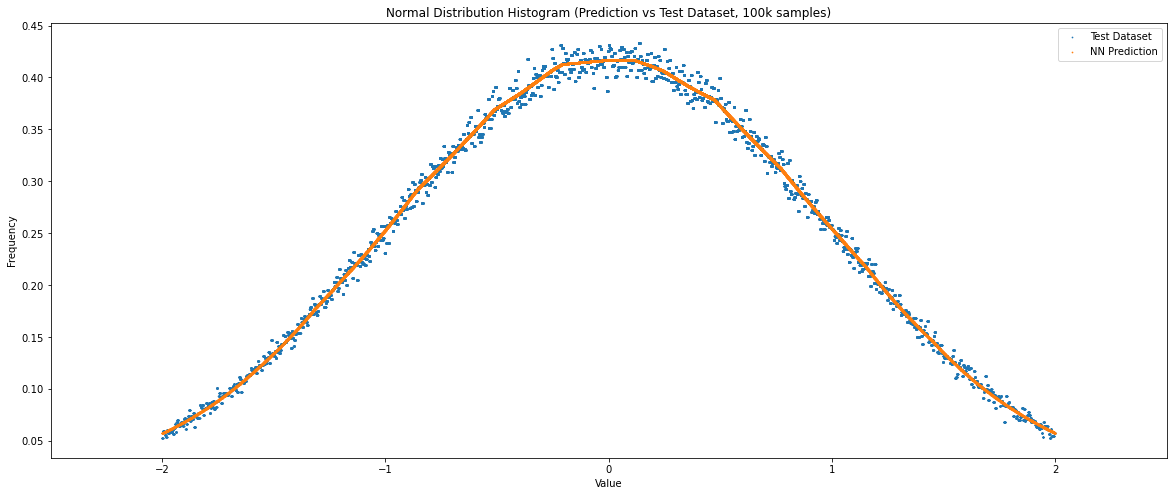

In [18]:
#Plot of Test and Prediction Network
print(f'Loss function: {loss_test_print}')
plt.figure(figsize=[20,8])
y_truth = plt.scatter(input_test,output_test_plot,s=0.5)
y_prediction = plt.scatter(input_test,output_prediction,s=0.5)
plt.xlim(min(input_test)-0.5, max(input_test)+0.5)
plt.legend((y_truth,y_prediction),('Test Dataset','NN Prediction'))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution Histogram (Prediction vs Test Dataset, 100k samples)')
plt.show()

***
## Comparison of Output (varying $\mu$ and $\sigma$)

#### $\mu \,=\, 0$ and $\sigma \,=\, 5$
Loss function: 3.015059051986703e-06
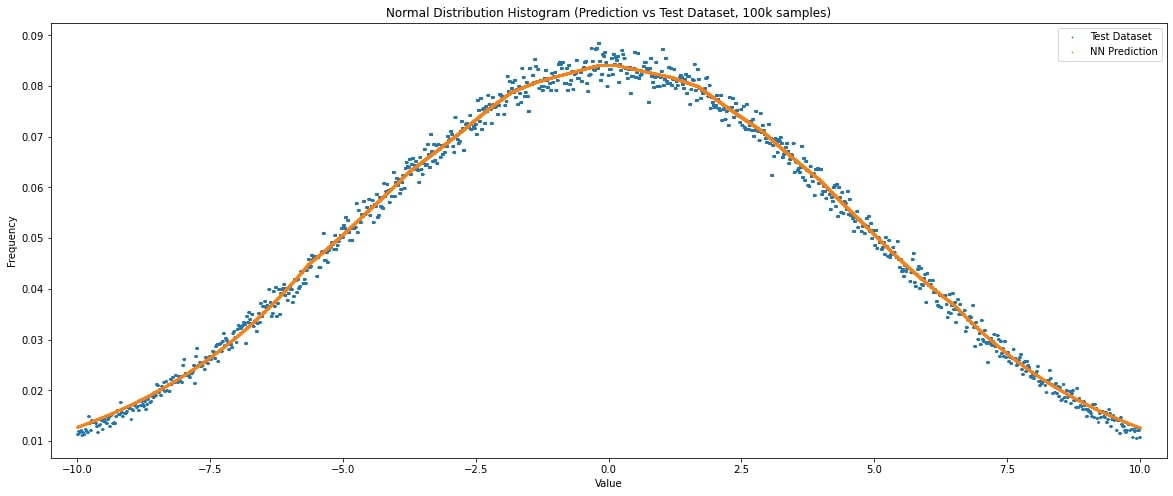
#### $\mu \,=\, 0$ and $\sigma \,=\, 3$
Loss function: 8.564220751548846e-06
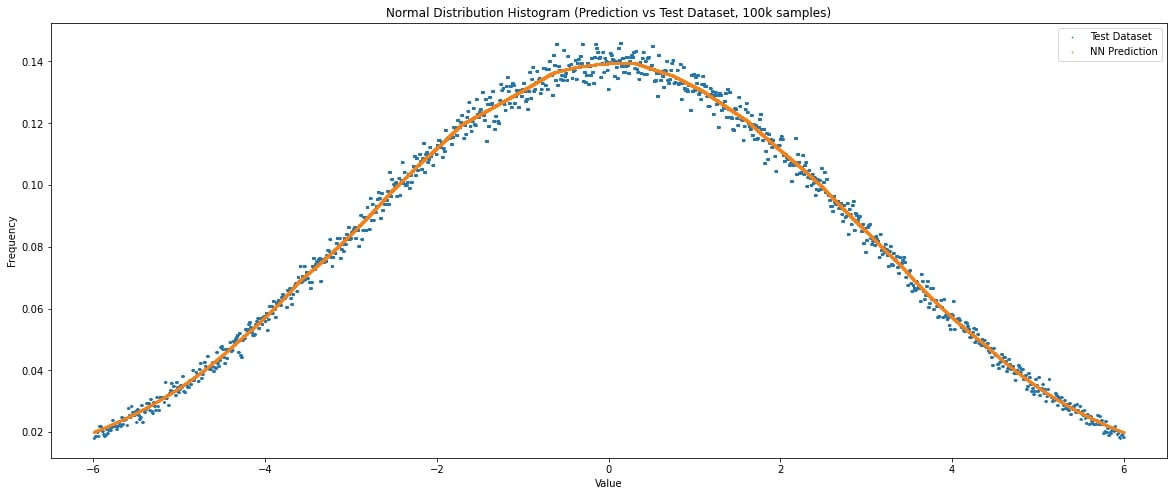
#### $\mu \,=\, 0$ and $\sigma \,=\, 1$
Loss function: 8.121080786232209e-05
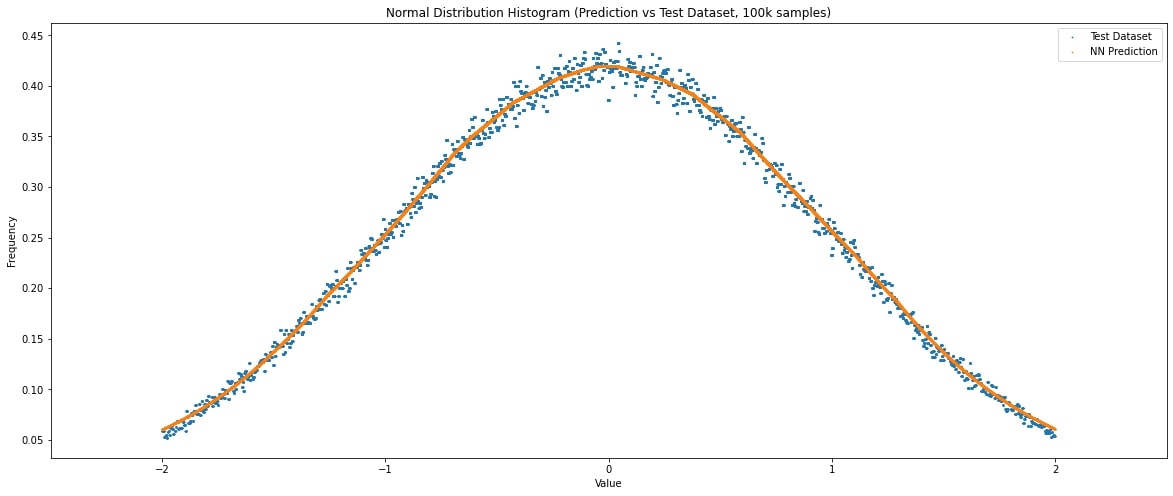
#### $\mu \,=\, 0$ and $\sigma \,=\, 0.5$
Loss function: 0.0002929366828029651
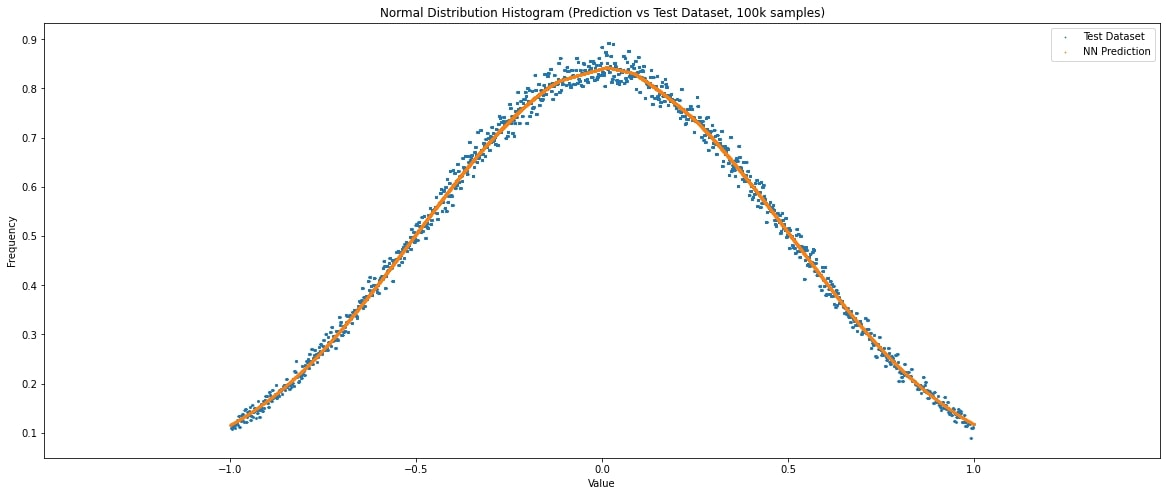
#### $\mu \,=\, 0$ and $\sigma \,=\, 0.03$
Loss function: 98.33825414185893
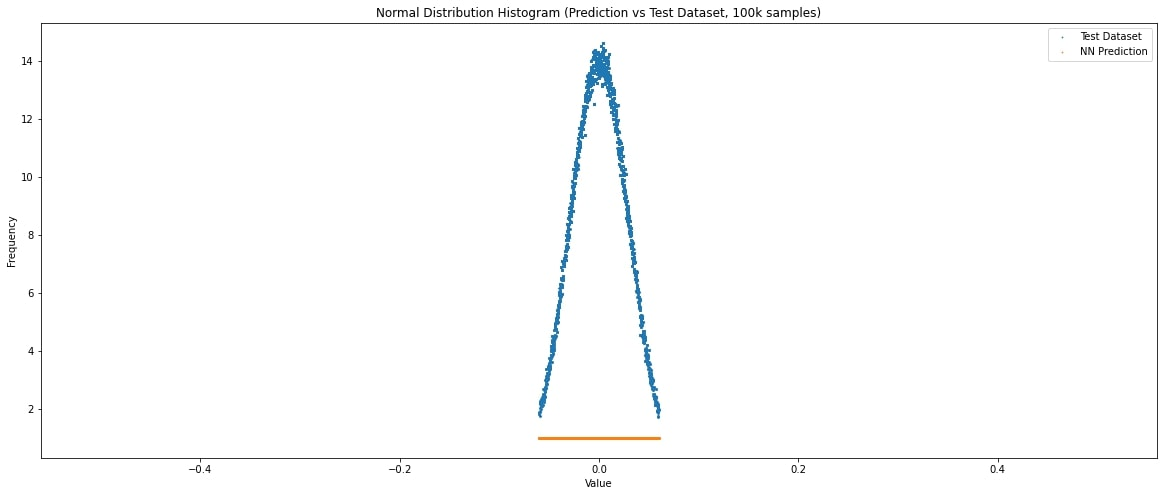
***
#### $\mu \,=\, 5$ and $\sigma \,=\, 1$
Loss function: 8.661231960854849e-05
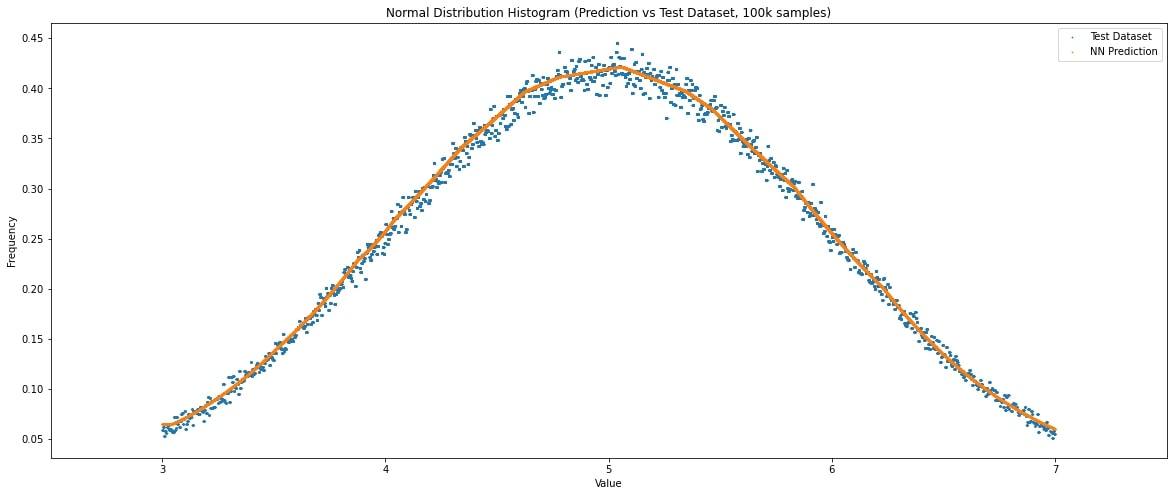
#### $\mu \,=\, 3$ and $\sigma \,=\, 1$
Loss function: 7.526963470949286e-05
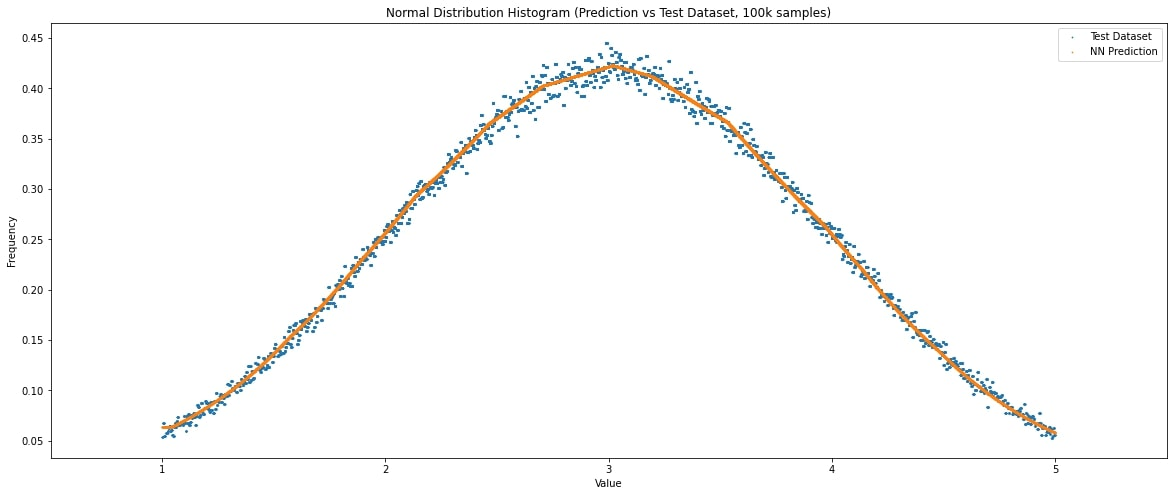
#### $\mu \,=\, 1$ and $\sigma \,=\, 1$
Loss function: 7.897982060379072e-05
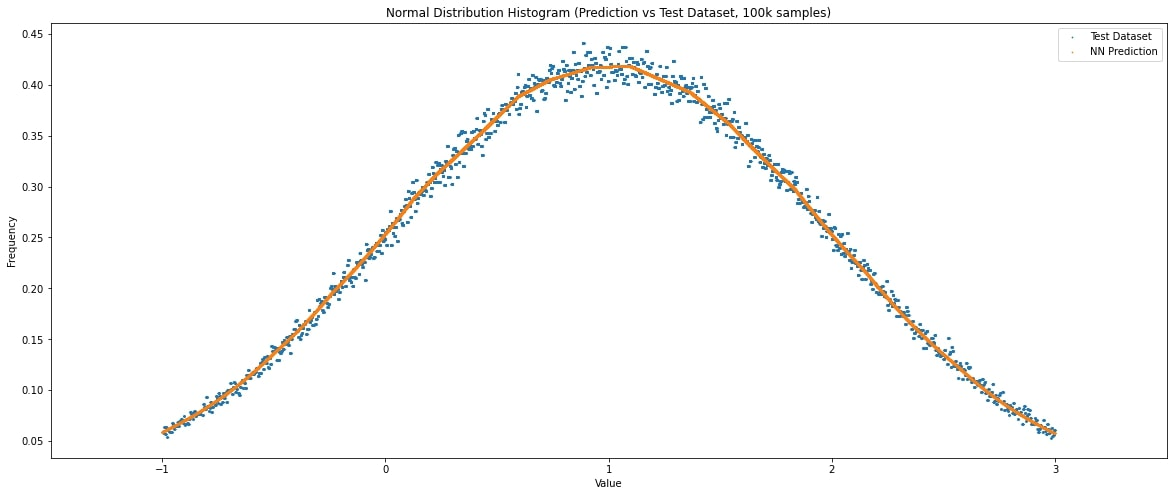
#### $\mu \,=\, 0.5$ and $\sigma \,=\, 1$
Loss function: 8.011001243635459e-05
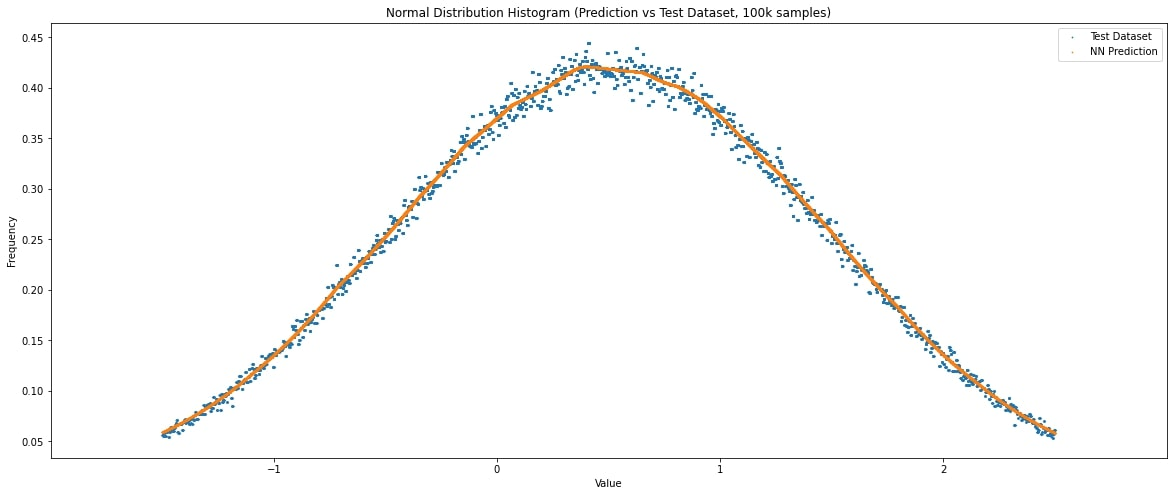
#### $\mu \,=\, 0.03$ and $\sigma \,=\, 1$
Loss function: 7.722763581170722e-05
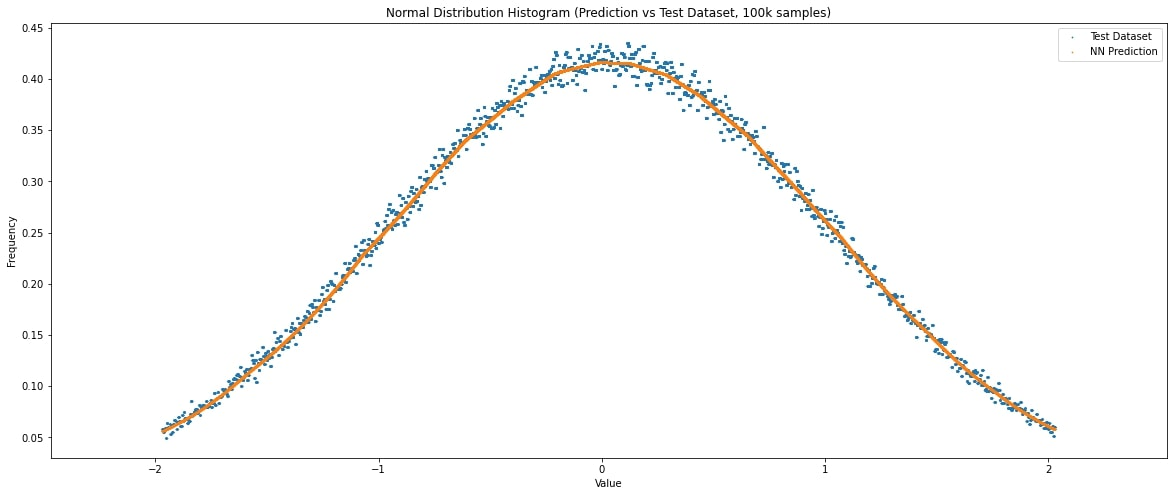

### Some notes on the results

Based on the outputs and the loss values computed, it seems that the model can fit the gaussian distribution well. However, whenever the standard deviation decreases below 0.45, the predictions become wrong. I am not sure why it happens but I think it is related to the values of the freq axis since the freq axis can be considered as p(x) when the argument density=True and when the value of standard deviation decreases below 0.45, the max value usually becomes greater than 1 which does not make sense since the integral of the probability of all the samples (area under the curve) must be equal to 1 and std <0.45 makes the area under the curve to be not equal to 1.

The plots shown here is how the mean and standard deviation affect the output plots. Mean basically acts as an offset in the x-axis (value) since the mean is the center of a Gaussian Distribution. Standard deviation on the other hand, adjusts the width of the distribution depending on the value so higher standard deviation results in a larger width and lower standard deviation results in narrow width. The narrow width can also affect the probability since the more narrow the width, the higher the height of the curve that affect the overall area. 

I think that the cause of why standard deviation values less than 0.45 tend to not be modelled properly is because the values are not normalized? Although I am not sure about this.

Overall, the 3-layer network constructed is good at modelling a Gaussian distribution at a certain interval. However, improvements on the gradient descent (like variable learning rate) might be a good idea for optimizing the network and minimizing the processing time since the longest part of this code is the training part so decreasing the epoch can save time.